In [46]:
import pandas as pd

In [47]:
simple_train=['call you tonight','call me aftab','please call me','what is']

In [48]:
from sklearn.feature_extraction.text import CountVectorizer
vect=CountVectorizer()

In [49]:
vect.fit(simple_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [50]:
vect.get_feature_names()

['aftab', 'call', 'is', 'me', 'please', 'tonight', 'what', 'you']

In [51]:
simple_train_dtm=vect.transform(simple_train)

In [52]:
simple_train_dtm.toarray()

array([[0, 1, 0, 0, 0, 1, 0, 1],
       [1, 1, 0, 1, 0, 0, 0, 0],
       [0, 1, 0, 1, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 1, 0]], dtype=int64)

In [53]:
pd.DataFrame(simple_train_dtm.toarray(),columns=vect.get_feature_names())

,aftab,call,is,me,please,tonight,what,you
0,0,1,0,0,0,1,0,1
1,1,1,0,1,0,0,0,0
2,0,1,0,1,1,0,0,0
3,0,0,1,0,0,0,1,0


In [54]:
url='https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv'
sms=pd.read_table(url,sep='\t',header=None,names=['label','message'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead.
  


In [55]:
sms.shape

(5572, 2)

In [56]:
sms.head(10)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [57]:
sms.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [58]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [59]:
y=sms.label.value_counts()

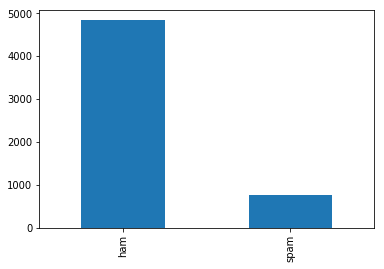

In [60]:
y.plot(kind='bar',)

In [61]:
sms['label_num']=sms.label.map({'ham':0,'spam':1})

In [62]:
sms.shape

(5572, 3)

In [63]:
sms.head(5)

,label,message,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [64]:
X=sms.message

In [65]:
y=sms.label_num

In [66]:
print(X.shape)
print(y.shape)

(5572,)
(5572,)


In [67]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1)
print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(4179,)
(1393,)
(4179,)
(1393,)


In [68]:
vect=CountVectorizer()

In [69]:
vect.fit(X_train)
X_train_dtm = vect.transform(X_train)

In [70]:
X_train_dtm=vect.fit_transform(X_train)

In [71]:
X_train_dtm

<4179x7456 sparse matrix of type '<class 'numpy.int64'>'
	with 55209 stored elements in Compressed Sparse Row format>

In [72]:
X_test_dtm = vect.transform(X_test)
X_test_dtm

<1393x7456 sparse matrix of type '<class 'numpy.int64'>'
	with 17604 stored elements in Compressed Sparse Row format>

In [73]:
from sklearn.naive_bayes import MultinomialNB

In [74]:
nb=MultinomialNB()

In [75]:
%time nb.fit(X_train_dtm,y_train)

Wall time: 20 ms


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [76]:
y_pred_class = nb.predict(X_test_dtm)
y_pred_class

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [77]:
from __future__ import print_function
print("True:",y_test.values[0])
print("True",y_pred_class[0])

True: 0
True 0


In [78]:
count=0
for i in range (len(y_pred_class)):
    if y_test.values[i]==y_pred_class[i]:
        count=count+1
print(count)

1377


In [81]:
print("accuracy percentage",count/len(y_pred_class))

accuracy percentage 0.9885139985642498


In [83]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
fpr,tpr,threasholds = roc_curve()

TypeError: unsupported operand type(s) for -: 'str' and 'str'